Ednei Cunha Vicente

Projeto Analise de Regressão - Prever a quantidade de bikes alugada na cidade de Seul.

Meta principal - Usando Analise de Regressão para prever a quantidade de bikes alugada na cidade de Seul.
 
1 - Analise de Correlação para identificar quais variaveis se relacionam, afim de iniciar o processo de analise.

2 - Com base na analise de correlação, extrair relacionamentos entre as variáveis.

3 - Investigar a variavel contagem de bikes com valores igual a zero.

4 - Dias com maior numero com contagens igual a 0.

5 - Por fim uma analise preditiva, com uso de varios algoritmos e tecnicas de avaliacao de acuracia.

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.linear_model import LinearRegression, LassoCV , ElasticNet
from sklearn.ensemble import ExtraTreesRegressor , GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports para formatação dos gráficos
import matplotlib as m
plt.style.use('fivethirtyeight')
#plt.style.use("estilos/personalestilo-1.mplstyle")
m.rcParams['axes.labelsize'] = 20
m.rcParams['xtick.labelsize'] = 18
m.rcParams['ytick.labelsize'] = 18
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8

In [3]:
#variavel para renomear colunas
col = ['Data','Contagem_Bikes','Hora','Temperatura','Umidade','Velc_Vento','Visibilidade','Temp_orvalho',
      'Radiacao_solar','Precipitacao','Queda_neve','Estacoes_Ano','Ferias','Dia_funcional']

In [4]:
#importando conjunto de dados
df = pd.read_csv('SeoulBikeData.csv',encoding="latin-1")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#aplicando a renomeacao dos nomes das colunas
df.columns = col
df.head()

,Data,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve,Estacoes_Ano,Ferias,Dia_funcional
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
#funcao describe para primeira analise
df.describe()

,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
Data              8760 non-null object
Contagem_Bikes    8760 non-null int64
Hora              8760 non-null int64
Temperatura       8760 non-null float64
Umidade           8760 non-null int64
Velc_Vento        8760 non-null float64
Visibilidade      8760 non-null int64
Temp_orvalho      8760 non-null float64
Radiacao_solar    8760 non-null float64
Precipitacao      8760 non-null float64
Queda_neve        8760 non-null float64
Estacoes_Ano      8760 non-null object
Ferias            8760 non-null object
Dia_funcional     8760 non-null object
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [8]:
#funcao describe com include para variaveis categoricas
df.describe(include=['O'])

,Data,Estacoes_Ano,Ferias,Dia_funcional
count,8760,8760,8760,8760
unique,365,4,2,2
top,31/12/2017,Summer,No Holiday,Yes
freq,24,2208,8328,8465


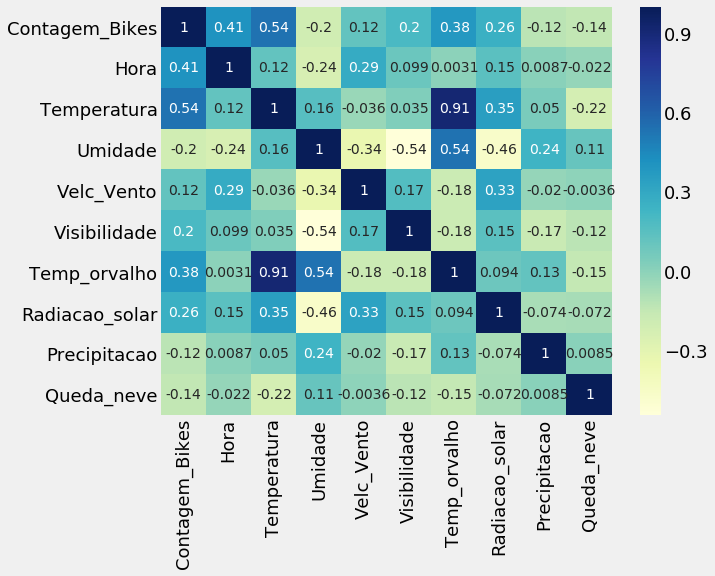

In [9]:
#analise de correlacao(contagem_bikes,tempratura,hora,queda_neve)serao analisadas com mais atencao
plt.figure(figsize=(9,7))

sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')

In [10]:
df_1 = df
df['Data'] = pd.to_datetime(df['Data'],format='%d/%m/%Y')
df['Year'] = df['Data'].dt.year
df['Month'] = df['Data'].dt.month
df['Day'] = df["Data"].dt.day
df.head()

,Data,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve,Estacoes_Ano,Ferias,Dia_funcional,Year,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


In [11]:
#criar uma coluna com dia da semana em texto
from datetime import datetime
df_1['Dia_semana'] = df_1.Data.map(lambda x : x.strftime("%A"))
df_1['Dia_semana'].value_counts()

Friday       1272
Sunday       1248
Saturday     1248
Monday       1248
Wednesday    1248
Tuesday      1248
Thursday     1248
Name: Dia_semana, dtype: int64

In [12]:
df_1 = df.set_index('Data')

In [13]:
df_1.head()

,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve,Estacoes_Ano,Ferias,Dia_funcional,Year,Month,Day,Dia_semana
Data,,,,,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday


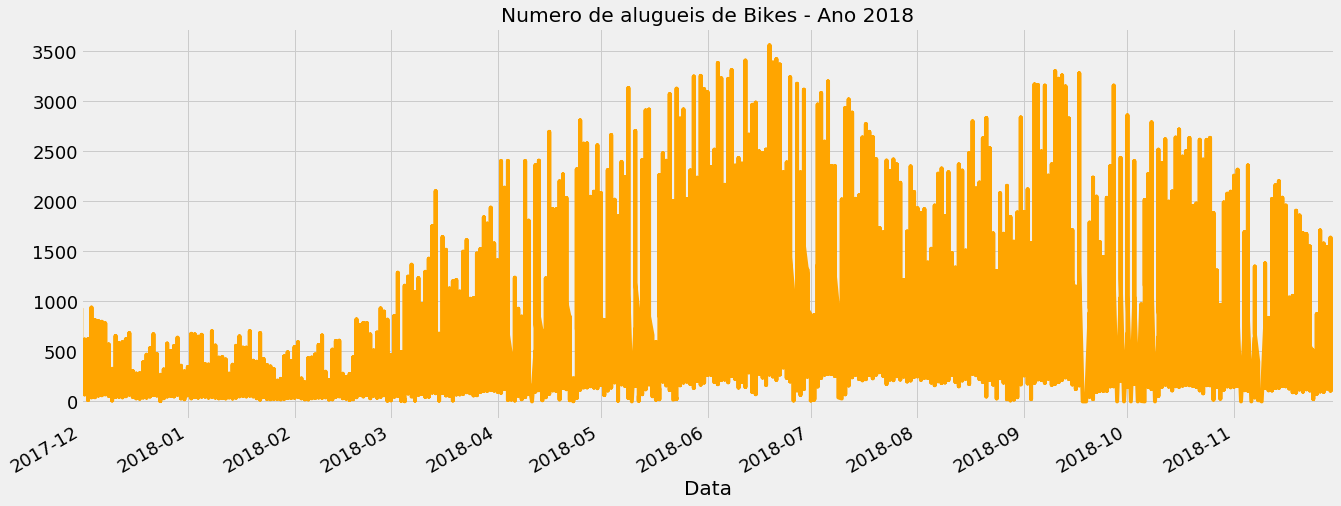

In [14]:
df_1['Contagem_Bikes'].plot(color='orange', title='Numero de alugueis de Bikes - Ano 2018')

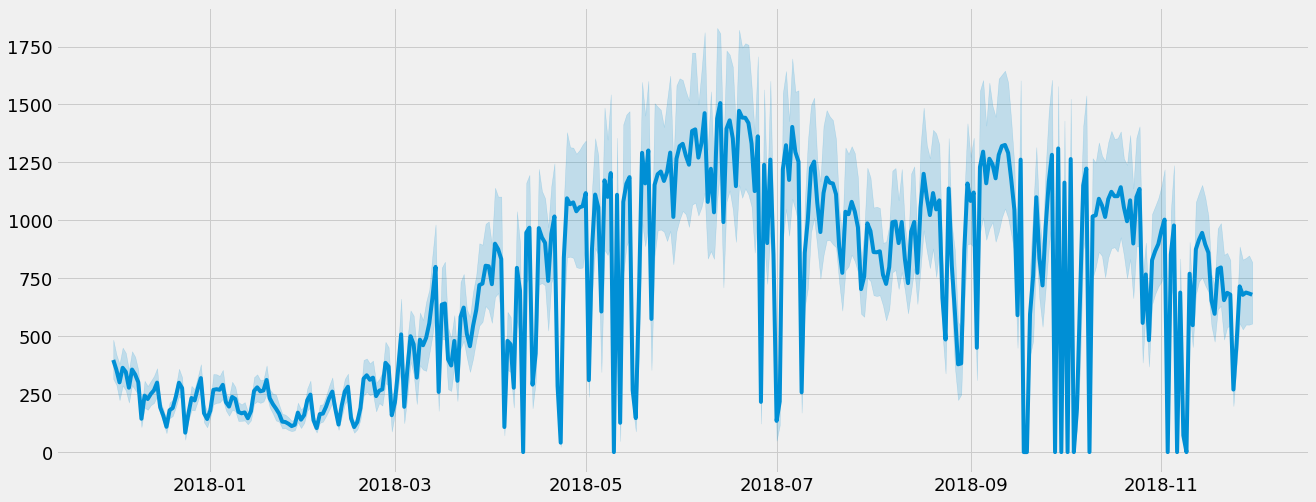

In [15]:
#grafico de linha de aluguel de bikes ao longo de 2018
sns.lineplot(data=df_1['Contagem_Bikes'])

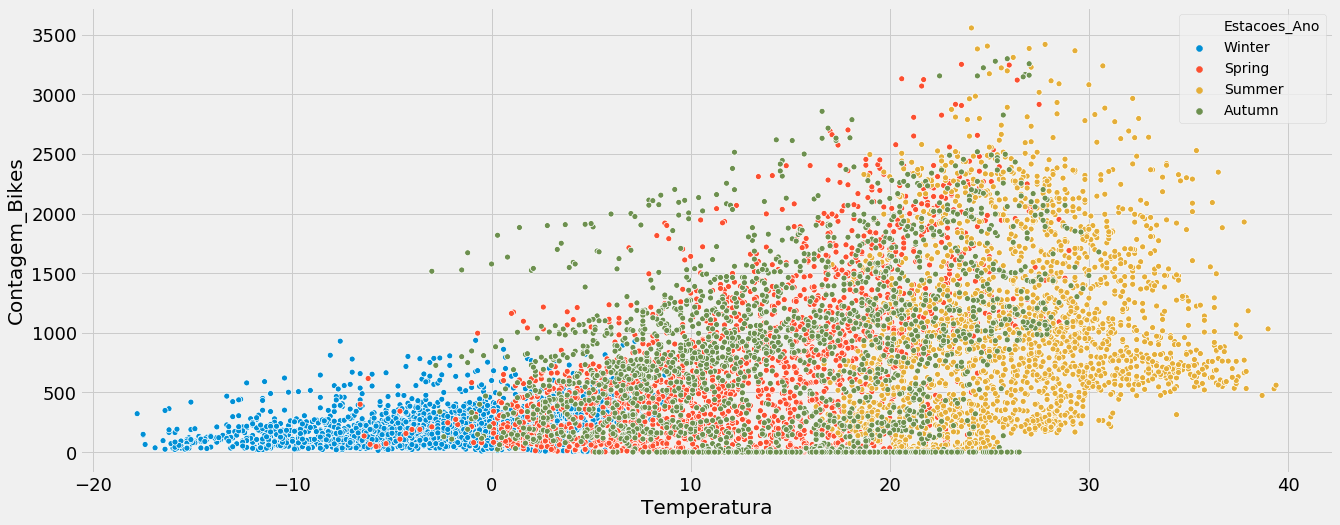

In [16]:
#Um grafico plotado só para confirmar a correlacao, a medida que a temperatura aumenta tambem aumenta o aluguel de bikes
sns.scatterplot(data=df_1 ,x='Temperatura',y='Contagem_Bikes',hue='Estacoes_Ano')

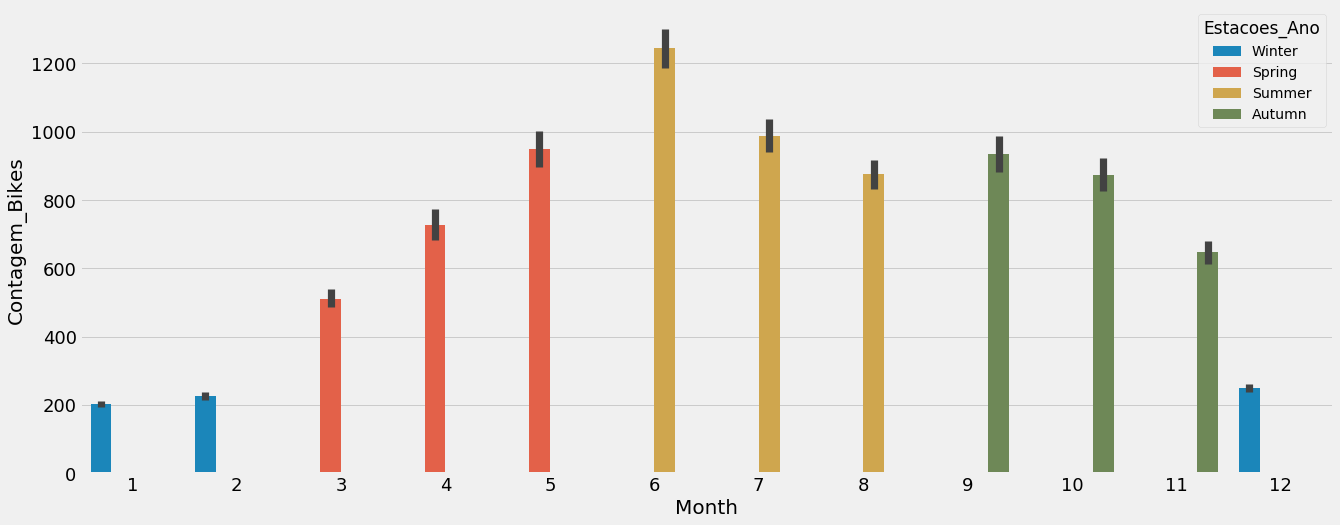

In [17]:
#contagem de bikes por mes : nota-se que do mes 4 ao mes 10 fica em torno de 800 alugueis. 
sns.barplot(data=df_1 ,x='Month',y='Contagem_Bikes',hue='Estacoes_Ano')

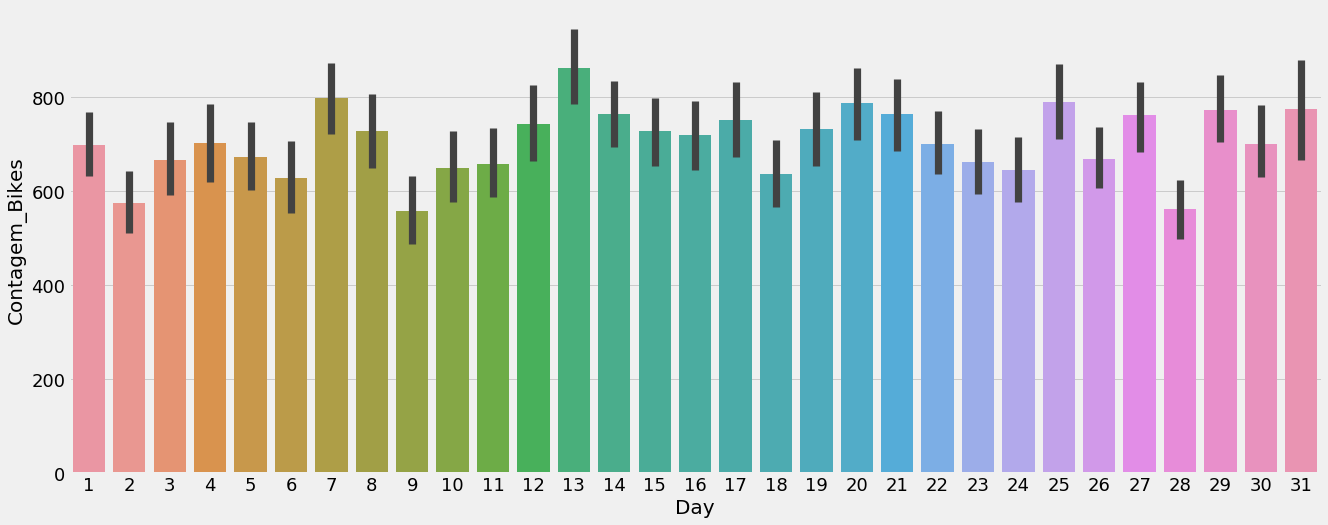

In [18]:
#contagem de alugueis por dia seguem a mesma proporção.
sns.barplot(data=df_1 ,x='Day',y='Contagem_Bikes')

In [19]:
#um filtro sobre a queda de alugueis de bikes, nota-se que o mes 09; em 96 contagem nao houve aluguel, cabe uma analise investigativa.
conta0 = df_1[(df_1.Month == 9) & (df_1.Contagem_Bikes == 0)]
conta0.describe()

,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve,Year,Month,Day
count,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.0,96.0,96.00000
mean,0.0,11.500000,19.873958,57.625000,1.400000,1868.979167,10.770833,0.543958,0.002083,0.0,2018.0,9.0,23.75000
std,0.0,6.958524,3.331042,13.415819,0.955758,210.732306,3.696454,0.744776,0.014358,0.0,0.0,0.0,5.33706
min,0.0,0.000000,14.100000,28.000000,0.200000,1057.000000,1.400000,0.000000,0.000000,0.0,2018.0,9.0,18.00000
25%,0.0,5.750000,17.375000,47.750000,0.700000,1780.000000,8.975000,0.000000,0.000000,0.0,2018.0,9.0,18.75000
50%,0.0,11.500000,19.500000,59.000000,1.200000,2000.000000,11.450000,0.030000,0.000000,0.0,2018.0,9.0,23.50000
75%,0.0,17.250000,21.825000,69.000000,1.700000,2000.000000,13.900000,0.985000,0.000000,0.0,2018.0,9.0,28.50000
max,0.0,23.000000,26.500000,81.000000,4.600000,2000.000000,16.100000,2.740000,0.100000,0.0,2018.0,9.0,30.00000


In [20]:
#criando novo dataframe somente com mes 09 e dando um describe! é possivel ver 720 registros dos quais 96 foram contagem 0 alugueis
mes09 = df_1[(df_1.Month==9)]
mes09.describe()

,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve,Year,Month,Day
count,720.000000,720.000000,720.00000,720.00000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.0,720.0,720.000000
mean,935.572222,11.500000,21.49875,60.70000,1.554028,1816.797222,12.908194,0.654111,0.095139,0.0,2018.0,9.0,15.500000
std,745.310358,6.926999,3.64937,17.21779,0.912644,402.298957,4.523049,0.928371,0.794551,0.0,0.0,0.0,8.661458
min,0.000000,0.000000,10.80000,26.00000,0.000000,285.000000,1.400000,0.000000,0.000000,0.0,2018.0,9.0,1.000000
25%,253.500000,5.750000,18.90000,47.00000,1.000000,1915.500000,9.500000,0.000000,0.000000,0.0,2018.0,9.0,8.000000
50%,915.000000,11.500000,21.40000,59.00000,1.400000,2000.000000,13.500000,0.030000,0.000000,0.0,2018.0,9.0,15.500000
75%,1438.500000,17.250000,24.20000,73.25000,2.000000,2000.000000,16.600000,1.175000,0.000000,0.0,2018.0,9.0,23.000000
max,3298.000000,23.000000,30.50000,97.00000,5.100000,2000.000000,23.900000,3.120000,13.000000,0.0,2018.0,9.0,30.000000


In [21]:
#investigando dias da semana; nao houve nenhum impacto sobre os alugueis
mes09['Dia_semana'].value_counts()

Sunday       120
Saturday     120
Tuesday       96
Friday        96
Wednesday     96
Thursday      96
Monday        96
Name: Dia_semana, dtype: int64

In [22]:
#dataframe com todas as contagens igual a 0 ; que foram 295 espalhado ao ano de 2018.
contagem0 = df_1[(df_1.Contagem_Bikes==0)]
contagem0.describe()

,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve,Year,Month,Day
count,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0,295.0,295.000000,295.000000
mean,0.0,11.298305,16.092881,60.494915,1.696949,1521.542373,7.770169,0.604780,0.136271,0.0,2018.0,9.023729,12.264407
std,0.0,6.979501,4.690414,16.331779,1.094120,580.913593,4.373466,0.883754,1.203795,0.0,0.0,2.143519,8.938067
min,0.0,0.000000,5.200000,21.000000,0.000000,201.000000,-7.000000,0.000000,0.000000,0.0,2018.0,4.000000,2.000000
25%,0.0,5.000000,12.300000,49.000000,0.900000,1055.000000,5.300000,0.000000,0.000000,0.0,2018.0,9.000000,6.000000
50%,0.0,11.000000,16.300000,62.000000,1.500000,1814.000000,7.800000,0.000000,0.000000,0.0,2018.0,10.000000,9.000000
75%,0.0,17.000000,19.350000,73.000000,2.350000,2000.000000,11.000000,1.065000,0.000000,0.0,2018.0,10.000000,18.000000
max,0.0,23.000000,26.500000,96.000000,5.300000,2000.000000,16.100000,3.320000,18.000000,0.0,2018.0,11.000000,30.000000


In [23]:
#um filtro sobre os meses que contabilizaram 0 de alugueis, é possivel ver que os meses 09,10,11 como lideres em alugueis 0.
contagem0['Month'].value_counts()

9     96
10    79
11    72
5     24
4     24
Name: Month, dtype: int64

In [24]:
#finalmente encontrei a solução; variavel dia_funcional(dia que abriu empresa; dia que nao abriu a empresa), foram 295 registros
contagem0['Dia_funcional'].value_counts()

No    295
Name: Dia_funcional, dtype: int64

In [25]:
df_1['Dia_funcional'].value_counts()

Yes    8465
No      295
Name: Dia_funcional, dtype: int64

In [26]:
#um filtro com as variaveis Dia funcional = No e Contagem bikes = 0.
no_func = df_1[(df_1.Dia_funcional == 'No') & (df_1.Contagem_Bikes == 0)]
no_func.head()

,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve,Estacoes_Ano,Ferias,Dia_funcional,Year,Month,Day,Dia_semana
Data,,,,,,,,,,,,,,,,,
2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Wednesday
2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Wednesday
2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Wednesday
2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Wednesday
2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Wednesday


In [27]:
no_func.describe()

,Contagem_Bikes,Hora,Temperatura,Umidade,Velc_Vento,Visibilidade,Temp_orvalho,Radiacao_solar,Precipitacao,Queda_neve,Year,Month,Day
count,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0,295.0,295.000000,295.000000
mean,0.0,11.298305,16.092881,60.494915,1.696949,1521.542373,7.770169,0.604780,0.136271,0.0,2018.0,9.023729,12.264407
std,0.0,6.979501,4.690414,16.331779,1.094120,580.913593,4.373466,0.883754,1.203795,0.0,0.0,2.143519,8.938067
min,0.0,0.000000,5.200000,21.000000,0.000000,201.000000,-7.000000,0.000000,0.000000,0.0,2018.0,4.000000,2.000000
25%,0.0,5.000000,12.300000,49.000000,0.900000,1055.000000,5.300000,0.000000,0.000000,0.0,2018.0,9.000000,6.000000
50%,0.0,11.000000,16.300000,62.000000,1.500000,1814.000000,7.800000,0.000000,0.000000,0.0,2018.0,10.000000,9.000000
75%,0.0,17.000000,19.350000,73.000000,2.350000,2000.000000,11.000000,1.065000,0.000000,0.0,2018.0,10.000000,18.000000
max,0.0,23.000000,26.500000,96.000000,5.300000,2000.000000,16.100000,3.320000,18.000000,0.0,2018.0,11.000000,30.000000


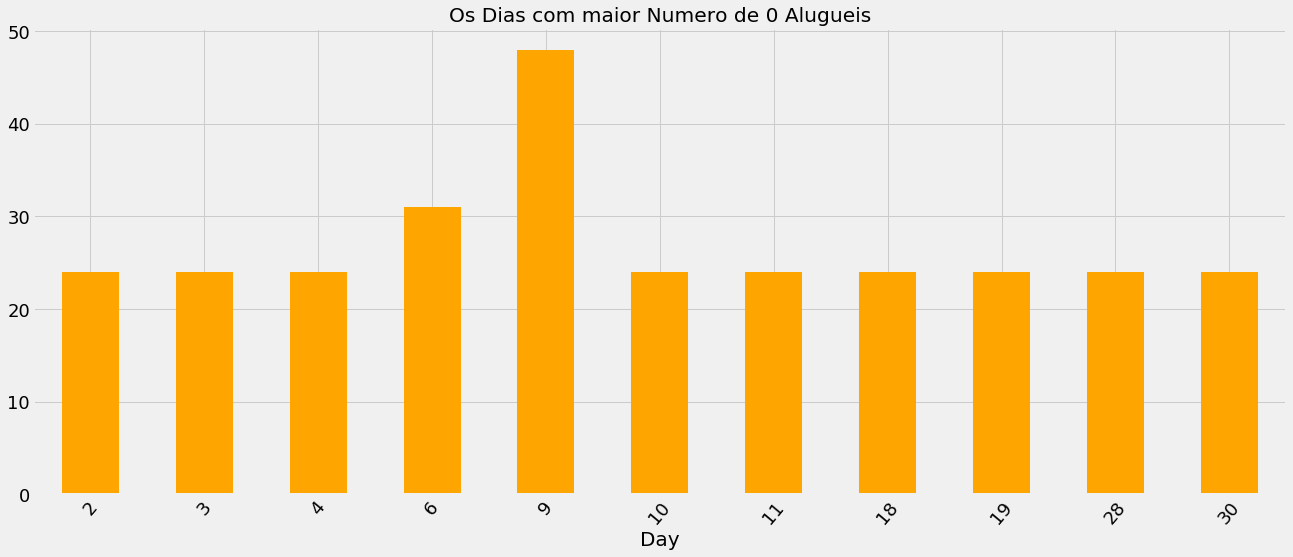

In [28]:
#usando a funcao groupby chega-se a conclusao que dias 9 e 6 são os com maior indice de alugueis == 0.
no_func.groupby(['Day'])['Hora'].count().plot(kind='bar',stacked=True,rot=50,color='orange',
                                              title='Os Dias com maior Numero de 0 Alugueis')

Analise Preditiva de Regressão

In [29]:
#separando os dados x e y
var = ['Hora','Temperatura','Umidade','Velc_Vento','Visibilidade','Temp_orvalho',
      'Radiacao_solar','Precipitacao','Queda_neve','Estacoes_Ano','Ferias','Dia_funcional']
var1 = ['Hora','Temperatura','Umidade','Estacoes_Ano']

In [30]:
df_1['Estacoes_Ano'] = df_1["Estacoes_Ano"].str.replace('Winter','1')
df_1['Estacoes_Ano'] = df_1["Estacoes_Ano"].str.replace('Spring','2')
df_1['Estacoes_Ano'] = df_1["Estacoes_Ano"].str.replace('Summer','3')
df_1['Estacoes_Ano'] = df_1["Estacoes_Ano"].str.replace('Autumn','4')
df_1['Ferias'] = df_1["Ferias"].str.replace('NoHoliday','1')
df_1['Ferias'] = df_1["Ferias"].str.replace('Holiday','2')
df_1['Ferias'] = df_1["Ferias"].str.replace('No 2','1')
df_1['Dia_funcional'] = df_1["Dia_funcional"].str.replace('Yes','1')
df_1['Dia_funcional'] = df_1["Dia_funcional"].str.replace('No','0')

In [31]:
#Primeira versao do modelo Regressao Linear, metrica vou usar mean_square_error e R^2.

#dataset de treino e teste
x = df_1[var]
y = df_1['Contagem_Bikes']

#divide os dados de teino e teste
x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size=0.33)

#criando o modelo
modelo_v1 = LinearRegression()

#treinando o modelo
modelo_v1.fit(x_train, y_train)

#fazendo previsoes
y_pred = modelo_v1.predict(x_teste)

#calculando a acuracia
mse = mean_squared_error(y_teste,y_pred)
r2 = r2_score(y_teste,y_pred)

#dicionario de metricas
modelo_dict_v1 = {'Modelo':"Regressao Linear",
                 'Versao1':'1',
                 'MSE':mean_squared_error(y_teste,y_pred),
                 'R^2':r2_score(y_teste,y_pred),
                 'MAE':mean_absolute_error(y_teste,y_pred)}

modelo_dict_v1

{'Modelo': 'Regressao Linear',
 'Versao1': '1',
 'MSE': 181539.93615632446,
 'R^2': 0.5526270925083878,
 'MAE': 321.8091630288823}

In [32]:
#Segunda versao do modelo ; aplicar escala nos dados
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)
#x_test_sc = scaler.fit_transform(x_teste)
#y = scaler.fit_transform(y)
#segunda versao do modelo com dados padronizados
x_train_sc, x_teste_sc, y_train, y_teste = train_test_split(x_sc, y, test_size=0.33)

#criando o modelo
modelo_v2 = LinearRegression()

#treinando o modelo
modelo_v2.fit(x_train_sc, y_train)

#fazendo previsoes
y_pred_v2 = modelo_v2.predict(x_teste_sc)

#calculando a acuracia
mse = mean_squared_error(y_teste,y_pred_v2)
r2 = r2_score(y_teste,y_pred_v2)

#dicionario de metricas
modelo_dict_v2 = {'Modelo':"Regressao Linear",
                 'Versao1':'2',
                 'MSE':mean_squared_error(y_teste,y_pred_v2),
                 'R^2':r2_score(y_teste,y_pred_v2),
                 'MAE':mean_absolute_error(y_teste,y_pred_v2)}

modelo_dict_v2

{'Modelo': 'Regressao Linear',
 'Versao1': '2',
 'MSE': 186471.7392916351,
 'R^2': 0.5417088804955381,
 'MAE': 325.3094649196987}

In [33]:
#realizar uma selecao de variaveis usando o algoritmo ExtraTreesRegressor
#Deacordo com a selecao; as variaveis "hora","temperatura","umidade","estacoes" sao as que tiveram importancia maiores
importance = ExtraTreesRegressor()

importance.fit(x_train_sc, y_train)

importance.feature_importances_

array([0.30265024, 0.15197664, 0.10123589, 0.02286931, 0.03386937,
       0.05216667, 0.07098649, 0.01736989, 0.00117604, 0.17145941,
       0.00661359, 0.06762646])

In [34]:
#A terceira versao do modelo continuarei usando a regressao logistica, porem com as variaveis indicadas pelo ExtraTreeRegressor
x_selec = df_1[var1]
y_selec = df_1['Contagem_Bikes']

#dividindo os dados
x_train_selec, x_test_selec, y_train_selec, y_test_selec = train_test_split(x_selec, y_selec, test_size=0.33)

#criando o modelo
modelo_v3 = LinearRegression()

#treinando o modelo
modelo_v3.fit(x_train_selec, y_train_selec)

#fazendo previsoes
y_pred_v3 = modelo_v3.predict(x_test_selec)

#dicionario de metricas
modelo_dict_v3 = {'Modelo':"Regressao Linear",
                 'Versao':'3',
                 'MSE':mean_squared_error(y_test_selec,y_pred_v3),
                 'R^2':r2_score(y_test_selec,y_pred_v3),
                 'MAE':mean_absolute_error(y_test_selec,y_pred_v3)}

modelo_dict_v3

{'Modelo': 'Regressao Linear',
 'Versao': '3',
 'MSE': 218627.4023593987,
 'R^2': 0.4494728728254971,
 'MAE': 341.75963296815905}

In [35]:
#quarta versao do modelo usarei o algoritmo de  Regressao Lasso 

#criando o modelo
modelo_v4 = LassoCV()

#treinando o modelo
modelo_v4.fit(x_train_selec, y_train_selec)

#fazendo previsoes
y_pred_v4 = modelo_v4.predict(x_test_selec)

#dicionario de metricas
modelo_dict_v4 = {'Modelo':"Regressao Lasso",
                 'Versao':'4',
                 'MSE':mean_squared_error(y_test_selec,y_pred_v4),
                 'R^2':r2_score(y_test_selec,y_pred_v4),
                 'MAE':mean_absolute_error(y_test_selec,y_pred_v4)}

modelo_dict_v4

{'Modelo': 'Regressao Lasso',
 'Versao': '4',
 'MSE': 218682.27673954229,
 'R^2': 0.44933469328107634,
 'MAE': 341.8549110418227}

In [36]:
#Na quarta versao usarei o algoritmo ElasticNet
#criando o modelo
modelo_v5 = ElasticNet()

#treinando o modelo
modelo_v5.fit(x_train_selec,y_train_selec)

#Fazendo previsoes
y_pred_v5 = modelo_v5.predict(x_test_selec)

#dicionario de metricas
modelo_dict_v5 = {'Modelo':"ElasticNet",
                 'Versao':'5',
                 'MSE':mean_squared_error(y_test_selec,y_pred_v5),
                 'R^2':r2_score(y_test_selec,y_pred_v5),
                 'MAE':mean_absolute_error(y_test_selec,y_pred_v5)}

modelo_dict_v5

{'Modelo': 'ElasticNet',
 'Versao': '5',
 'MSE': 219522.9988679423,
 'R^2': 0.44721766525483075,
 'MAE': 343.20626365503296}

In [37]:
#A sexta versao do modelo vou mudar a abordagem usando a funcao MinMaxScaler 
max_scaler = MinMaxScaler()
x_max = max_scaler.fit_transform(x)

#Dividindo os dados em treino e teste
x_train_max, x_teste_max, y_train, y_teste = train_test_split(x_max, y, test_size=0.33) 

#criando o modelo
modelo_v6 = LinearRegression()

#treinando o modelo
modelo_v6.fit(x_train_max,y_train)

#fazendo previsoes
y_pred_v6 = modelo_v6.predict(x_teste_max)

#dicionario de metricas
modelo_dict_v6 = {'Modelo':"Regressao com MaxScaler",
                 'Versao':'6',
                 'MSE':mean_squared_error(y_teste,y_pred_v6),
                 'R^2':r2_score(y_teste,y_pred_v6),
                 'MAE':mean_absolute_error(y_teste,y_pred_v6)}

modelo_dict_v6

{'Modelo': 'Regressao com MaxScaler',
 'Versao': '6',
 'MSE': 192606.70327132303,
 'R^2': 0.5476615890101557,
 'MAE': 328.28827609334235}

In [40]:
#A sexta versao do modelo vou mudar a abordagem usando a funcao MinMaxScaler e as variaveis selecionadas 

max_norm = Normalizer()
x_norm = x[var1]
x_norm = max_norm.fit_transform(x)

#Dividindo os dados em treino e teste
x_train_norm, x_teste_norm, y_train, y_teste = train_test_split(x_norm, y, test_size=0.33) 

#criando o modelo
modelo_v7 = LinearRegression()

#treinando o modelo
modelo_v7.fit(x_train_norm,y_train)

#fazendo previsoes
y_pred_v7 = modelo_v6.predict(x_teste_norm)

#dicionario de metricas
modelo_dict_v7 = {'Modelo':"Regressao com MaxScaler",
                 'Versao':'7',
                 'MSE':mean_squared_error(y_teste,y_pred_v7),
                 'R^2':r2_score(y_teste,y_pred_v7),
                 'MAE':mean_absolute_error(y_teste,y_pred_v7)}

modelo_dict_v7

{'Modelo': 'Regressao com MaxScaler',
 'Versao': '7',
 'MSE': 3001361.969433443,
 'R^2': -6.637316647751971,
 'MAE': 1623.1718594107624}

In [47]:
#Nao consegui abaixar o erro do modelo, vou rentar outro algoritmo 
#A terceira versao do modelo continuarei usando a regressao logistica, porem com as variaveis indicadas pelo ExtraTreeRegressor
x_selec = df_1[var1]
y_selec = df_1['Contagem_Bikes']

#dividindo os dados
x_train_selec, x_test_selec, y_train_selec, y_test_selec = train_test_split(x_selec, y_selec, test_size=0.33)

modelo_v8 = GradientBoostingRegressor()

modelo_v8.fit(x_train_selec,y_train_selec)

y_pred_v8 = modelo_v8.predict(x_test_selec)

#dicionario de metricas
modelo_dict_v8 = {'Modelo':"Regressao com MaxScaler",
                 'Versao':'',
                 'MSE':mean_squared_error(y_test_selec,y_pred_v8),
                 'R^2':r2_score(y_test_selec,y_pred_v7),
                 'MAE':mean_absolute_error(y_test_selec,y_pred_v7)}

modelo_dict_v8

{'Modelo': 'Regressao com MaxScaler',
 'Versao': '',
 'MSE': 99970.30629500531,
 'R^2': -6.586112069145037,
 'MAE': 1649.797594450541}